# Introduction

It may well happen that the filter response of an instrument of your interest is not in the default database. `sedcreator`, within the class `SedFitter`, provides a number of functions to add, plot, and remove custom filter responses. These filters responses are used to convolve the model flux in order to compare it to observations.

The are four main functions to deal with filters in `sedcreator`

`add_filter()`

`add_square_filter()`

`remove_filter()`

`plot_filter()`



In this notebook, we will learn how to use the above functions.

As always we start off by importing the packages. Even though in this example we will only make use of `SedFitter` and `ModelPlotter`, we also import `SedFluxer`  for completeness

In [1]:
from sedcreator import SedFluxer, SedFitter, ModelPlotter
import numpy as np

The first thing to do is to know what filters are already available in the database by default. You can do this by doing

In [2]:
SedFitter().print_default_filters

filter wavelength   instrument  
------ ---------- --------------
    2J        1.2          2MASS
    2H        1.6          2MASS
    2K        2.2          2MASS
    I1        3.6   Spitzer_IRAC
    I2        4.5   Spitzer_IRAC
    I3        5.6   Spitzer_IRAC
    I4        8.0   Spitzer_IRAC
    M1       24.0   Spitzer_MIPS
    M2       70.0   Spitzer_MIPS
    M3      160.0   Spitzer_MIPS
    F1        5.4  SOFIA_FORCAST
    F2        6.4  SOFIA_FORCAST
    F3        6.6  SOFIA_FORCAST
    F4        7.7  SOFIA_FORCAST
    F5        8.6  SOFIA_FORCAST
    F6       11.1  SOFIA_FORCAST
    F7       11.3  SOFIA_FORCAST
    F8       19.2  SOFIA_FORCAST
    F9       24.2  SOFIA_FORCAST
    L1       31.5  SOFIA_FORCAST
    L2       33.6  SOFIA_FORCAST
    L3       34.8  SOFIA_FORCAST
    L4       37.1  SOFIA_FORCAST
    P1       70.0  Herschel_PACS
    P2      100.0  Herschel_PACS
    P3      160.0  Herschel_PACS
    P4      250.0 Herschel_SPIRE
    P5      350.0 Herschel_SPIRE
    P6    

There are quite a few filters there, let's check how some of them look.

# Plotting some filter responses

For example let's explore the SOFIA FORCAST filter at 37µm.

To plot an _existing_ filter response from the database we can use the function `plot_filter()` which has 4 main input that are selfexplanatory. The key here is to input the correct name from the database above, in this case we want **L4**. Let's see how it looks.

**Note that the filter name has to be an array, even if you only want to plot one filter**

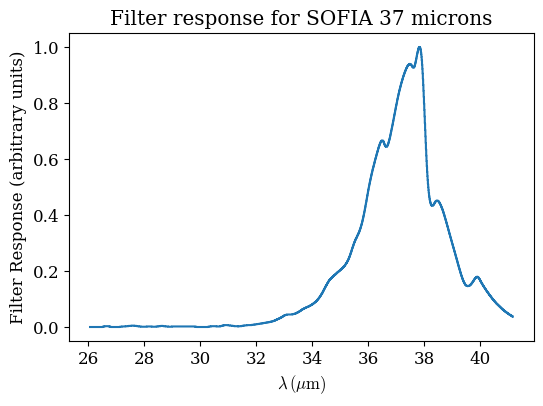

In [3]:
SedFitter().plot_filter(filter_name=['L4'],figsize=(6, 4),legend=False,title='Filter response for SOFIA 37 microns',figname=None)

Say that now we want to plot all Spitzer IRAC filter responses. We just need to input the filter names in an array. Let's also turn the `legend` on for clarity

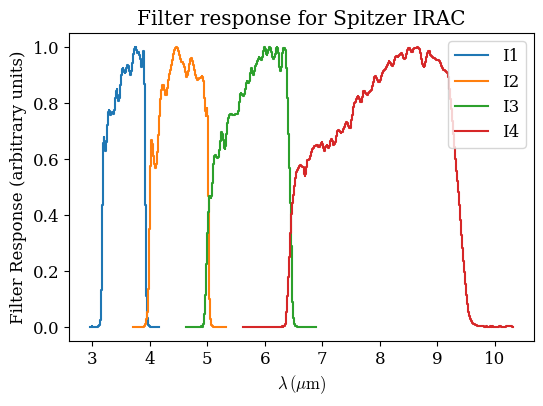

In [4]:
SedFitter().plot_filter(filter_name=['I1','I2','I3','I4'],figsize=(6, 4),legend=True,title='Filter response for Spitzer IRAC',figname=None)

# Add a filter with a known response

If you have a filter response for your instrument, you can add it to the sedcreator database and use it afterwards for the fitting by using `add_filter()`. The inputs needed for this function are:

``filter_name``

``instrument``

``lambda_array``

``response_array``

**Take into account that the array for the wavelength (lambda_array) needs to be in microns**. The units of the filter response are not important since it normalised by the peak. It is recommended that the filter name is informative but at the same time not too long, e.g., use one letter and one number or two letters and two numbers. This does not really matter because then you will need to call the filter name in the same way as you defined it for the SedFitter. The wavelength shown in the database will be the median of the lambda_array, but the entire filter response will be used when convolving the model flux.

We recommend using the following database to download the filter response for any given instrument: http://svo2.cab.inta-csic.es/theory/fps/

For this example, let's add the JWST NIRCam filter F480M, which is the longest available filter for this instrument. We have donwloaded the filter response in _.dat_ format from the webpage abave. It should be noted that the wavelength in these files are given in angstrom, so take extra care because the input for `add_filter` needs to be given in microns.

In [5]:
#There are many ways to do this in python. Just make sure you input in the add_filter function the appropiate arrays.
F480M_filter_lambda,F480M_filter_response = np.loadtxt('JWST_NIRCam.F480M.dat',unpack=True)

#Converting from angstroms to microns

F480M_filter_lambda_micron = F480M_filter_lambda*1e-4

In [6]:
SedFitter().add_filter(filter_name='F480M',instrument='JWST_NIRCam',
                       lambda_array=F480M_filter_lambda_micron,response_array=F480M_filter_response)

F480M.txt succesfully saved in /Users/fedriani/anaconda3/lib/python3.11/site-packages/sedcreator/Model_SEDs/parfiles/


Let's have a look at the filter database now

In [7]:
SedFitter().print_default_filters

filter wavelength   instrument  
------ ---------- --------------
    2J        1.2          2MASS
    2H        1.6          2MASS
    2K        2.2          2MASS
    I1        3.6   Spitzer_IRAC
    I2        4.5   Spitzer_IRAC
    I3        5.6   Spitzer_IRAC
    I4        8.0   Spitzer_IRAC
    M1       24.0   Spitzer_MIPS
    M2       70.0   Spitzer_MIPS
    M3      160.0   Spitzer_MIPS
    F1        5.4  SOFIA_FORCAST
    F2        6.4  SOFIA_FORCAST
    F3        6.6  SOFIA_FORCAST
    F4        7.7  SOFIA_FORCAST
    F5        8.6  SOFIA_FORCAST
    F6       11.1  SOFIA_FORCAST
    F7       11.3  SOFIA_FORCAST
    F8       19.2  SOFIA_FORCAST
    F9       24.2  SOFIA_FORCAST
    L1       31.5  SOFIA_FORCAST
    L2       33.6  SOFIA_FORCAST
    L3       34.8  SOFIA_FORCAST
    L4       37.1  SOFIA_FORCAST
    P1       70.0  Herschel_PACS
    P2      100.0  Herschel_PACS
    P3      160.0  Herschel_PACS
    P4      250.0 Herschel_SPIRE
    P5      350.0 Herschel_SPIRE
    P6    

Now we can see the new filter added and ready to be used in the SedFitter class

# Remove a filter

Say that we may a mistake and added a filter with the wrong name, wavelength (e.g. no in microns!), or response. We can easily remove it from the database by using `remove_filter`

In [8]:
SedFitter().remove_filter(filter_name='F480M')

The filter F480M has been removed from the database


Let's check again the filter database to see that F480M is no longer there

In [9]:
SedFitter().print_default_filters

filter wavelength   instrument  
------ ---------- --------------
    2J        1.2          2MASS
    2H        1.6          2MASS
    2K        2.2          2MASS
    I1        3.6   Spitzer_IRAC
    I2        4.5   Spitzer_IRAC
    I3        5.6   Spitzer_IRAC
    I4        8.0   Spitzer_IRAC
    M1       24.0   Spitzer_MIPS
    M2       70.0   Spitzer_MIPS
    M3      160.0   Spitzer_MIPS
    F1        5.4  SOFIA_FORCAST
    F2        6.4  SOFIA_FORCAST
    F3        6.6  SOFIA_FORCAST
    F4        7.7  SOFIA_FORCAST
    F5        8.6  SOFIA_FORCAST
    F6       11.1  SOFIA_FORCAST
    F7       11.3  SOFIA_FORCAST
    F8       19.2  SOFIA_FORCAST
    F9       24.2  SOFIA_FORCAST
    L1       31.5  SOFIA_FORCAST
    L2       33.6  SOFIA_FORCAST
    L3       34.8  SOFIA_FORCAST
    L4       37.1  SOFIA_FORCAST
    P1       70.0  Herschel_PACS
    P2      100.0  Herschel_PACS
    P3      160.0  Herschel_PACS
    P4      250.0 Herschel_SPIRE
    P5      350.0 Herschel_SPIRE
    P6    

# Adding a square response filter

It may be the case that we do not know the filter response of a given instrument. Or that we were given a flux from ancient times that no one knows where it comes from, but we know the wavelength at which was measure.

In this case, you cannot really add a filter response for an unknown instrument, right? For these cases, you may consider to add a very simple filter response in order to be able to use the flux in your fitting.

We can do this by using the `add_square_filter()` function. This allows you add a top hat profile centred at a given wavelength and with a given width.

In [10]:
#For this example let's add a filter response at 15 microns with a width of 1 micron.

SedFitter().add_square_filter(filter_name='Sq15',instrument='ancient_times',filter_lambda=15,filter_width=1)

WARNING! The filter Sq15 already exists in the database
WARNING! The filter file Sq15.fits already exists in the database


Let's make sure is in the database and let's have a look at it

In [11]:
SedFitter().print_default_filters

filter wavelength   instrument  
------ ---------- --------------
    2J        1.2          2MASS
    2H        1.6          2MASS
    2K        2.2          2MASS
    I1        3.6   Spitzer_IRAC
    I2        4.5   Spitzer_IRAC
    I3        5.6   Spitzer_IRAC
    I4        8.0   Spitzer_IRAC
    M1       24.0   Spitzer_MIPS
    M2       70.0   Spitzer_MIPS
    M3      160.0   Spitzer_MIPS
    F1        5.4  SOFIA_FORCAST
    F2        6.4  SOFIA_FORCAST
    F3        6.6  SOFIA_FORCAST
    F4        7.7  SOFIA_FORCAST
    F5        8.6  SOFIA_FORCAST
    F6       11.1  SOFIA_FORCAST
    F7       11.3  SOFIA_FORCAST
    F8       19.2  SOFIA_FORCAST
    F9       24.2  SOFIA_FORCAST
    L1       31.5  SOFIA_FORCAST
    L2       33.6  SOFIA_FORCAST
    L3       34.8  SOFIA_FORCAST
    L4       37.1  SOFIA_FORCAST
    P1       70.0  Herschel_PACS
    P2      100.0  Herschel_PACS
    P3      160.0  Herschel_PACS
    P4      250.0 Herschel_SPIRE
    P5      350.0 Herschel_SPIRE
    P6    

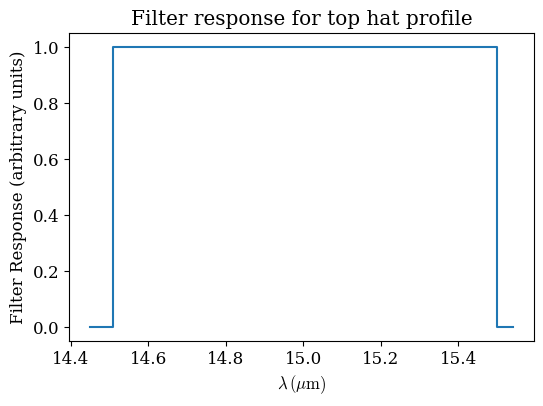

In [12]:
SedFitter().plot_filter(filter_name=['Sq15'],figsize=(6, 4),legend=False,title='Filter response for top hat profile',figname=None)

---
---
<font size="4">Author: R. Fedriani (Instituto de Astrofisica de Andalucia and Chalmers University of Technology)

Last update: 14 June 2024</font>

---